In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Data preprocessing
X = df['content']  # Tweets
y = df['sentiment']  # Corresponding sentiments


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


In [10]:
# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    lowercase=True,
    stop_words='english',  # Remove common English stopwords
    token_pattern=r'\b[^\d\W]+\b',  # Allow words with only letters
)

# Transform training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [11]:
# Train a sentiment analysis model (Linear Support Vector Classifier)
model = LinearSVC()
model.fit(X_train_tfidf, y_train)


LinearSVC()

In [12]:
# Make predictions and calculate accuracy
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.304125
Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        66
     boredom       0.08      0.04      0.05       103
       empty       0.05      0.01      0.02       487
  enthusiasm       0.05      0.01      0.02       476
         fun       0.11      0.06      0.08      1032
   happiness       0.29      0.31      0.30      3160
        hate       0.27      0.19      0.22       784
        love       0.37      0.37      0.37      2249
     neutral       0.33      0.44      0.38      5174
      relief       0.11      0.04      0.06       945
     sadness       0.28      0.27      0.28      3106
    surprise       0.10      0.05      0.07      1298
       worry       0.33      0.39      0.36      5120

    accuracy                           0.30     24000
   macro avg       0.18      0.17      0.17     24000
weighted avg       0.28      0.30      0.29     24000



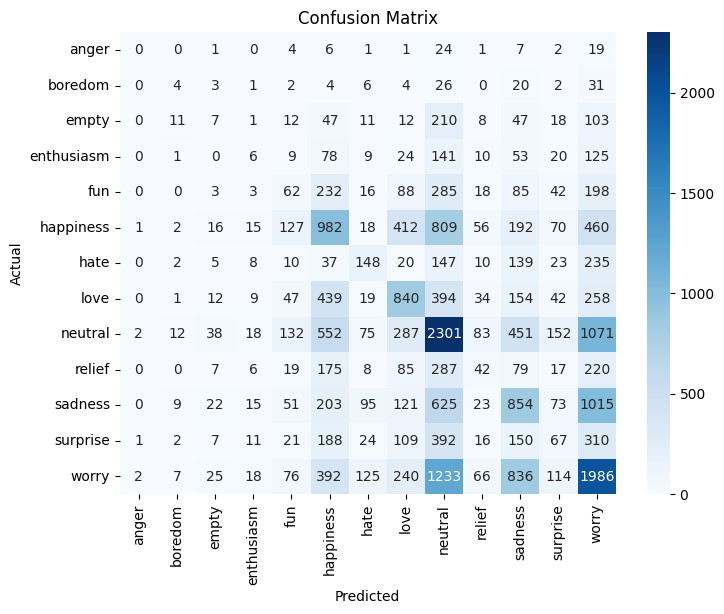

In [13]:
# Create a heatmap for the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# User input for sentiment prediction
while True:
    user_input = input("Enter a tweet (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting the program.")
        break

    # Transform user input and predict sentiment
    user_input_tfidf = tfidf_vectorizer.transform([user_input])
    user_sentiment = model.predict(user_input_tfidf)
    print("Predicted Sentiment:", user_sentiment[0])


Enter a tweet (or type 'exit' to quit): i am feeling alright
Predicted Sentiment: love
Enter a tweet (or type 'exit' to quit): i am feeling ok
Predicted Sentiment: worry
Enter a tweet (or type 'exit' to quit): i am feeling surprised
Predicted Sentiment: happiness
Enter a tweet (or type 'exit' to quit): i am feeling sad
Predicted Sentiment: sadness
Enter a tweet (or type 'exit' to quit): i am feeling happy
Predicted Sentiment: love
Enter a tweet (or type 'exit' to quit): i am feeling love
Predicted Sentiment: love
Enter a tweet (or type 'exit' to quit): exit
Exiting the program.
